# Kerri Anderson
AI/ML Project 1 - Cardio Good Fitness
June 2021

Objective - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.
You are expected to do the following :
1.	Come up with a customer profile (characteristics of a customer) of the different products
2.	Perform uni-variate and multi-variate analyses
3.	Generate a set of insights and recommendations that will help the company in targeting new customers


In [1]:
#install packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations #from MLS3

Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables
1.	Product - the model no. of the treadmill
2.	Age - in no of years, of the customer
3.	Gender - of the customer
4.	Education - in no. of years, of the customer
5.	Marital Status - of the customer
6.	Usage - Avg. # times the customer wants to use the treadmill every week
7.	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.	Income - of the customer
9.	Miles- expected to run
Explore the dataset to identify differences between customers of each product. You can also explore relationships between the different attributes of customers. You can approach it from any other line of questioning that you feel could be relevant for the business.


In [2]:
#import dataset CSV file
cgf=pd.read_csv("CardioGoodFitness.csv")

# Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [3]:
#look at first 5 rows of data
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#look at last 5 rows of data
cgf.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
#how many rows/col of data (180 rows, 9 columns)
cgf.shape

(180, 9)

In [6]:
#check data types - are they in line with data dictionary
cgf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Observation: data types are as expected

In [7]:
#check for missing values
cgf.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation: There does not appear to be any missing values in the dataset

# Analyze spread and distribution of every feature in the dataset

In [9]:
#describe numerical values in dataset
cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


Observations:
* Age - ranges from 18 to 50
* Education - ranges from 12 to 21 (might want to bucket this into HS, college, post grad)
* Usage - ranges from 2 to 7 (nothing more than 7 days per week, which is good)
* Fitness - ranges from 1 to 5
* Income - ranges from 29k to 104k
* Miles - ranges from 21  to 360 (not clear if this is per week, month, year, etc. - would ask for this information from data owner)

All numeric vaules seem within a reasonable range

In [10]:
#check the values of character variables
cgf['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [11]:
cgf['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [12]:
cgf['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Observations: All character values are reasonable

# Create a visual depiction of spread and distribution of values

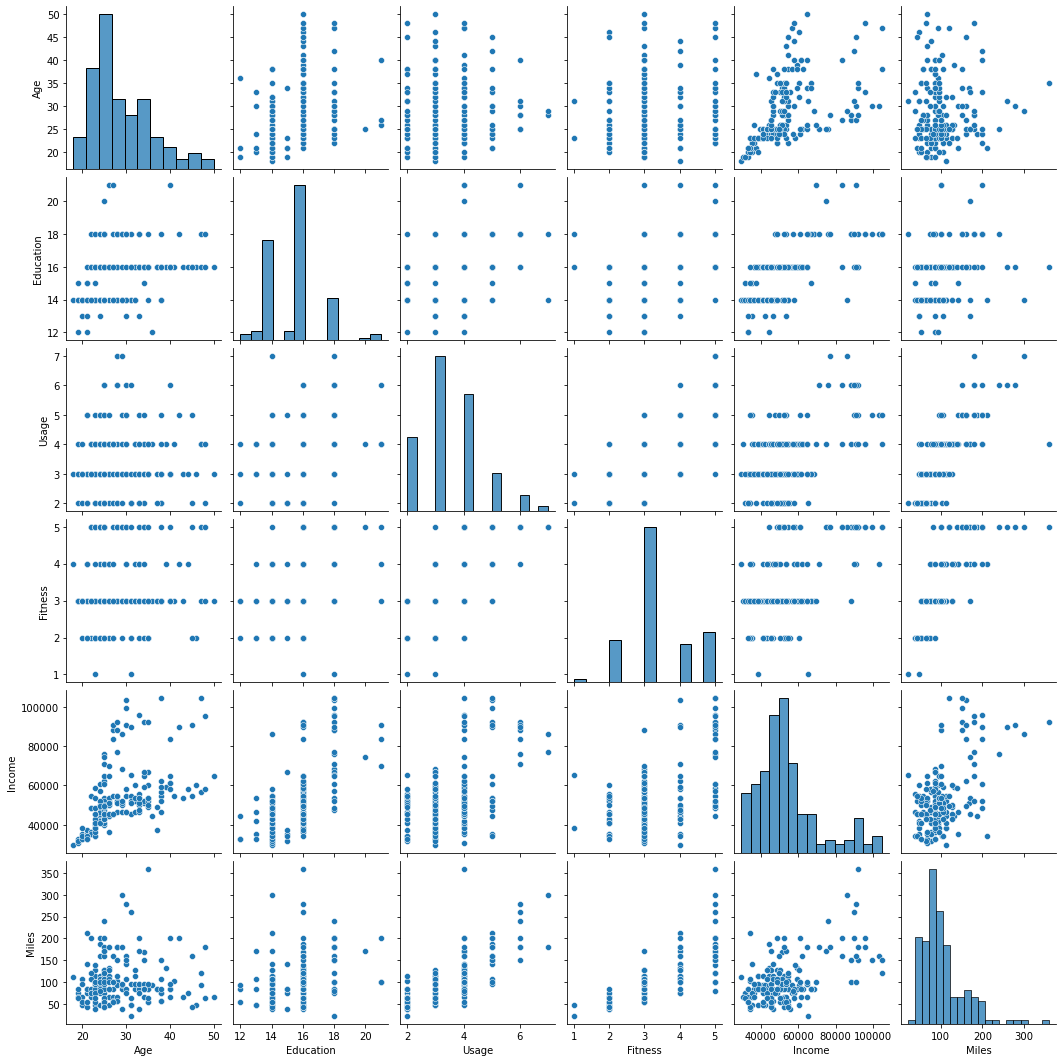

In [13]:
#univariate plots and pairwise plots of numerical data
sns.pairplot(cgf)

Univariate Observations:
* Age tends to be younger, majority <30 (median is 26, mean is 28.7)
* Education has three larger values, might want to group others into these categories for simplification of data
* Most people want to use 3 times per week
* Most people consider themseves a 3 on a scale of 1-5 of fitness
* Income tends to be ~50k - could be considered in marketing what is perceived as affordable vs luxuy item
* Most looking to run <100 miles in given timeframe, some outliers (do the outliers buy a different type of treadmil?)

Bivariate Observations:
* Higher age positively correlated with higher income
* Higher age negatively correlated with higher miles
* Education seems to be positively correlated with income
* Usage seems to be correlated with mileage, with one outlier with medium number of uses and very high mileage, would go back to data source to confirm if error or may remove from dataset
* Self-perceived fitness level positively correlated with miles run

## Gender

<AxesSubplot:xlabel='Gender', ylabel='Age'>

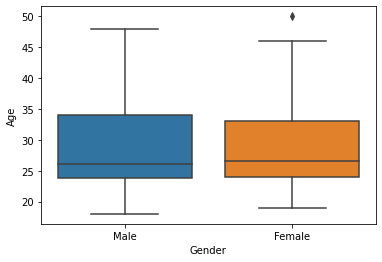

In [14]:
#box plots for numerical vs categorical data
sns.boxplot(x=cgf['Gender'], y=cgf['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Education'>

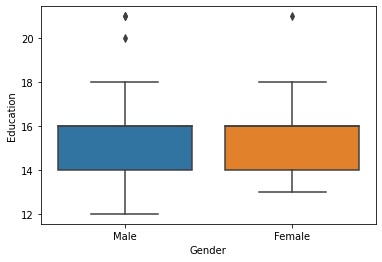

In [15]:
sns.boxplot(x=cgf['Gender'], y=cgf['Education'])

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

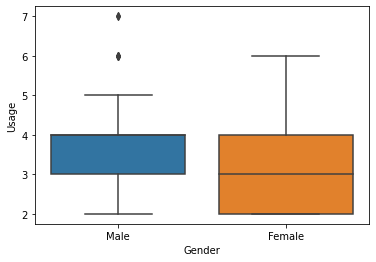

In [16]:
sns.boxplot(x=cgf['Gender'], y=cgf['Usage'])

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

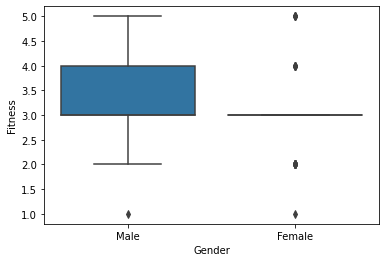

In [17]:
sns.boxplot(x=cgf['Gender'], y=cgf['Fitness'])

<AxesSubplot:xlabel='Gender', ylabel='Income'>

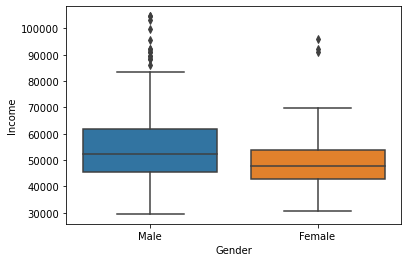

In [18]:
sns.boxplot(x=cgf['Gender'], y=cgf['Income'])

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

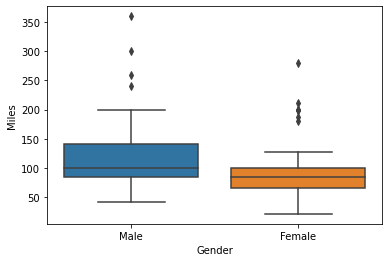

In [19]:
sns.boxplot(x=cgf['Gender'], y=cgf['Miles'])

Observations:
* Age and education is similar between males and females
* Females report a wider range of usage and smaller range of perceived fitness
* Males report a higher income and more miles run

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

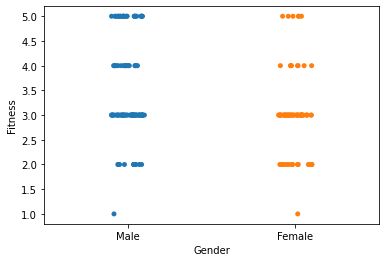

In [20]:
#choose a different visualization for gender vs fitness to get more information on distribution
sns.stripplot(x=cgf['Gender'], y=cgf['Fitness'])

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

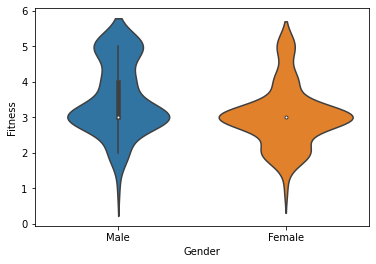

In [21]:
#violin plot seems best suited to visualization of this data
sns.violinplot(x=cgf['Gender'], y=cgf['Fitness'])

## Marital Status

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

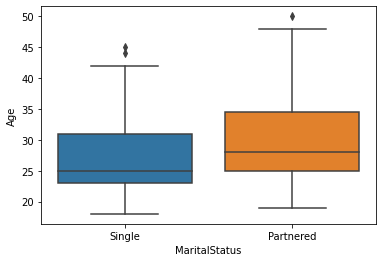

In [22]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Age'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Education'>

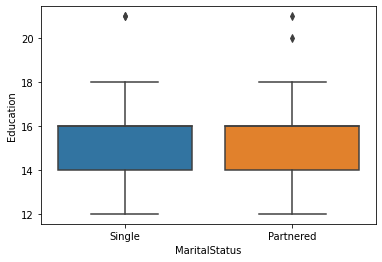

In [23]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Education'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

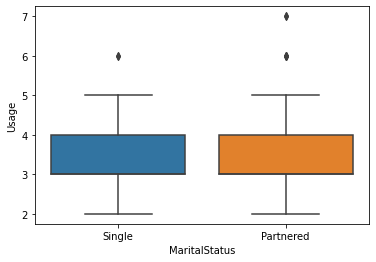

In [24]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Usage'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Fitness'>

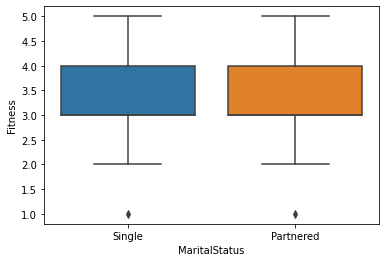

In [25]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Fitness'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

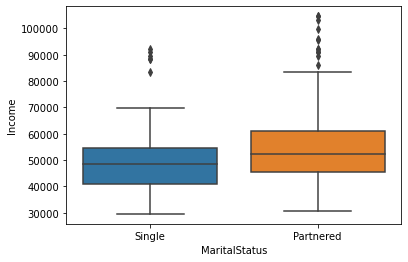

In [26]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Income'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Miles'>

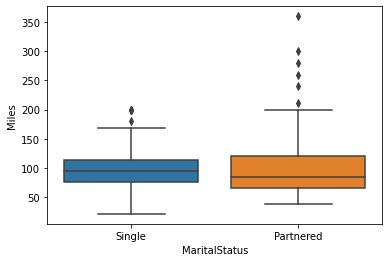

In [27]:
sns.boxplot(x=cgf['MaritalStatus'], y=cgf['Miles'])

Observations:
* Married individuals tend to be older with higher income

## Product

<AxesSubplot:xlabel='Product', ylabel='Age'>

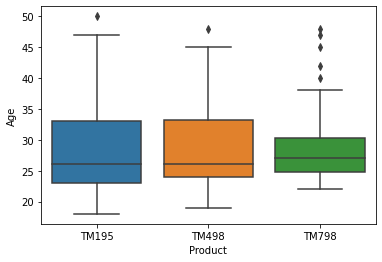

In [28]:
sns.boxplot(x=cgf['Product'], y=cgf['Age'])

<AxesSubplot:xlabel='Product', ylabel='Education'>

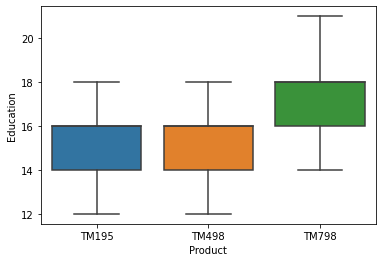

In [29]:
sns.boxplot(x=cgf['Product'], y=cgf['Education'])

<AxesSubplot:xlabel='Product', ylabel='Usage'>

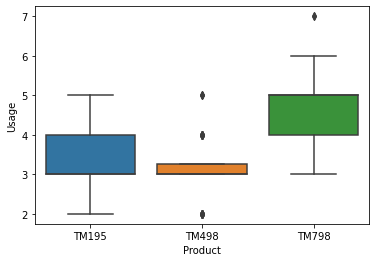

In [30]:
sns.boxplot(x=cgf['Product'], y=cgf['Usage'])

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

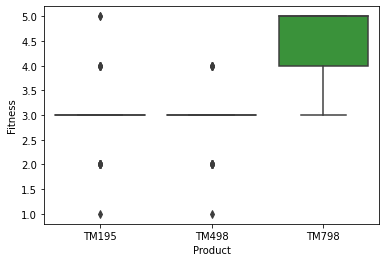

In [31]:
sns.boxplot(x=cgf['Product'], y=cgf['Fitness'])

<AxesSubplot:xlabel='Product', ylabel='Income'>

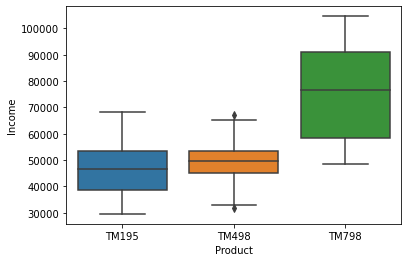

In [32]:
sns.boxplot(x=cgf['Product'], y=cgf['Income'])

<AxesSubplot:xlabel='Product', ylabel='Miles'>

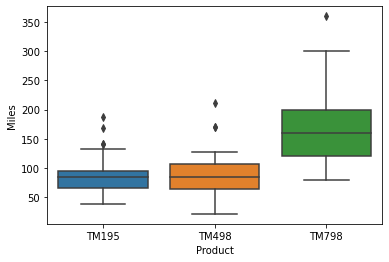

In [33]:
sns.boxplot(x=cgf['Product'], y=cgf['Miles'])

<AxesSubplot:xlabel='Product', ylabel='Usage'>

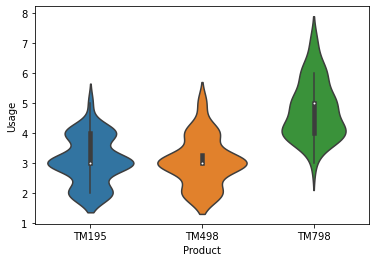

In [34]:
#use a violin plot for a more clear visualization
sns.violinplot(x=cgf['Product'], y=cgf['Usage'])

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

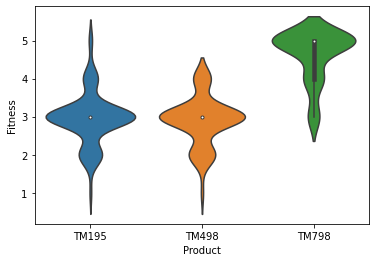

In [35]:
sns.violinplot(x=cgf['Product'], y=cgf['Fitness'])

Observations:
* The TM195 and TM498 products appear to be similar with regard to most quantitative variables
* The TM195 might be more marketable as less expensive treadmill, based on purchase history for those with lower income
* The TM798 appears to be more of an elite product for older adults with higher education and income and/or higher fitness level and associated usage and miles run

## Categorical vs Categorical

Graph each categorical variable combination to identify any underlying trends

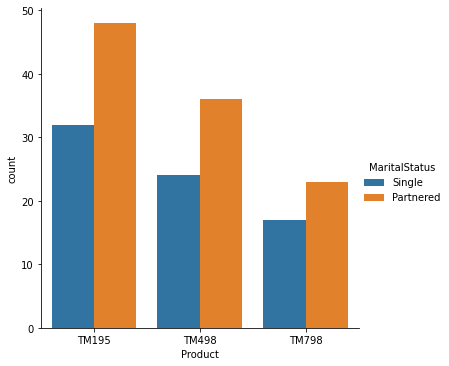

In [36]:
sns.catplot(x='Product', kind='count', hue='MaritalStatus',data=cgf)

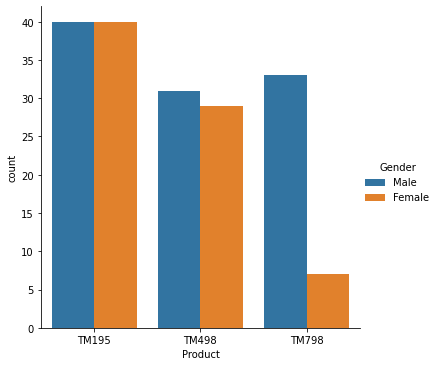

In [37]:
sns.catplot(x='Product', kind='count', hue='Gender',data=cgf)

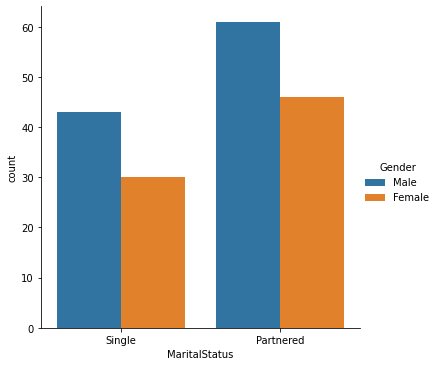

In [38]:
sns.catplot(x='MaritalStatus', kind='count', hue='Gender',data=cgf)

Observation:
* Males tend to buy the TM798 more than females
* For other products, the male/female split it nearly the same

## Correlations with heatmap

<AxesSubplot:>

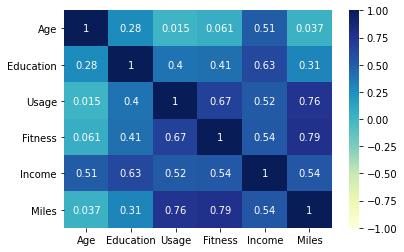

In [39]:
correlation = cgf.corr() # creating a 2-D Matrix with correlation plots
correlation
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

Observations:
* Information gleaned from the heatmap is similar to those taken from ealier observations
* Miles is positively correlated with usage and fitness level
* Income is positively associated with education and age

# Explore further visualization to identify multi-variate trends, based on univariate and bivariate analysis thus far

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

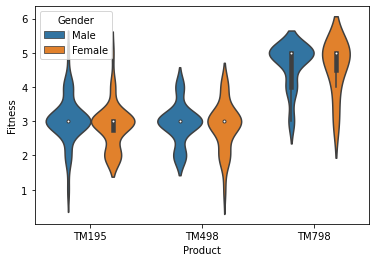

In [40]:
sns.violinplot(x=cgf['Product'], y=cgf['Fitness'], hue=cgf['Gender'])

<AxesSubplot:xlabel='Product', ylabel='Usage'>

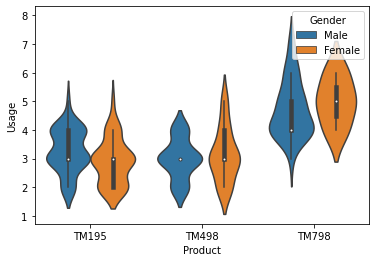

In [41]:
sns.violinplot(x=cgf['Product'], y=cgf['Usage'], hue=cgf['Gender'])

<AxesSubplot:xlabel='Product', ylabel='Miles'>

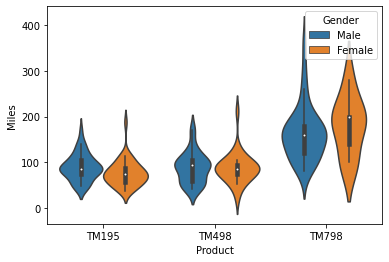

In [42]:
sns.violinplot(x=cgf['Product'], y=cgf['Miles'], hue=cgf['Gender'])

Observation:
* The TM798 appeals to those with high fitness/usage/mileage - should target this audience, and it does not differ by gender

<AxesSubplot:xlabel='Product', ylabel='Income'>

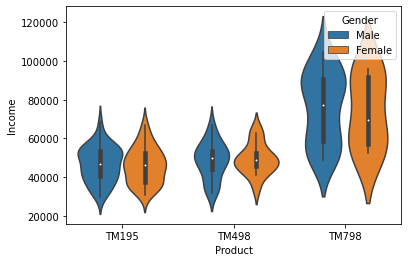

In [43]:
sns.violinplot(x=cgf['Product'], y=cgf['Income'], hue=cgf['Gender'])

Observation:

* The TM798 appeals to those with higher income, and should be marketed as an elite or luxury product

Conclusion: 
* There is not a lot of perceived difference in the profiles of customers who purchase the TM195 vs TM498
* The TM 798 appears to be a luxury product that appeals to those with higher income and/or higher level of fitness and miles run